# Causal Analysis of COVID-19 Data

* Thant Saing (42902347)
* Syed Hasan (45220700)
* Duy Hung Nguyen (46137920)
* Mekal Botani (46417397)

### Importing Datasets

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE

In [2]:
# Importing world covid dataset
covid_world = pd.read_csv('data/owid-covid-data.csv')
covid_world.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,0.0,0.0,NaN,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,0.0,0.0,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
3,ABW,North America,Aruba,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
4,ABW,North America,Aruba,2020-03-22,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN


In [3]:
covid_world.shape

(43705, 41)

In [4]:
covid_world.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,4.312700e+04,42932.000000,42150.000000,43127.000000,42932.000000,42150.000000,42868.000000,42868.000000,42085.000000,42868.000000,...,38502.000000,25712.000000,39012.000000,40376.000000,30649.000000,30264.000000,18198.000000,35289.000000,42903.000000,37638.000000
mean,8.907480e+04,1353.262555,1338.518602,3761.959098,43.077704,43.158846,1703.651181,22.898294,22.576835,53.831384,...,21019.494210,11.986283,251.185610,8.046306,10.844870,32.638024,52.632567,3.117573,74.067096,0.725948
std,9.227078e+05,12355.746754,12129.388282,35130.531770,365.467764,355.578724,3687.587533,70.917752,54.548907,138.860311,...,20489.485327,19.126521,117.678053,4.140803,10.483549,13.404531,31.568773,2.533082,7.362591,0.152652
min,0.000000e+00,-8261.000000,-552.000000,0.000000,-1918.000000,-232.143000,0.000000,-2212.545000,-269.978000,0.000000,...,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.354000
25%,4.800000e+01,0.000000,0.429000,0.000000,0.000000,0.000000,22.505000,0.000000,0.116000,0.000000,...,5338.454000,0.500000,153.507000,5.310000,1.900000,21.400000,21.222000,1.300000,69.910000,0.606000
50%,8.870000e+02,9.000000,13.571000,16.000000,0.000000,0.143000,260.642000,1.417000,2.755000,4.360000,...,14103.452000,1.800000,237.372000,7.110000,6.400000,31.400000,55.182000,2.500000,75.490000,0.755000
75%,9.386000e+03,151.000000,155.429000,201.000000,3.000000,2.857000,1703.543750,15.865750,17.432000,32.669750,...,32415.132000,16.000000,318.949000,10.180000,19.600000,40.900000,83.741000,4.200000,79.930000,0.853000
max,2.904913e+07,310098.000000,270609.429000,924706.000000,10491.000000,7456.571000,42255.281000,4944.376000,882.924000,1237.551000,...,116935.600000,77.600000,724.417000,23.360000,44.000000,78.100000,98.999000,13.800000,86.750000,0.953000


In [5]:
# Importing Australian air traffic dataset during covid period
covid_AUS = pd.read_csv('data/airline_portcountry.csv')
covid_AUS.head()

,Month,Airline,Port_Country,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Year,Month_num
0,31048,Air Caledonie,New Caledonia,725,0.368,0.0,474,0.167,0.0,1985,1
1,31048,Air China,China,1311,9.158,0.0,1232,2.587,0.0,1985,1
2,31048,Air India,India,1423,44.823,0.0,970,6.708,0.0,1985,1
3,31048,Air India,Singapore,501,10.583,0.0,306,124.966,0.0,1985,1
4,31048,Air Nauru,Nauru,161,0.212,0.0,96,23.996,0.0,1985,1


In [6]:
covid_AUS.shape

(42562, 11)

In [7]:
covid_AUS.describe()

,Month,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Year,Month_num
count,42562.000000,42562.000000,42562.000000,42562.000000,42562.000000,42562.000000,42562.000000,42562.000000,42562.000000
mean,37768.091936,8315.612589,292.008323,14.348111,8197.086110,265.432268,8.385675,2002.946008,6.466660
std,3685.211634,16068.946762,663.087850,40.637817,15824.591058,611.263825,28.735126,10.091557,3.460081
min,31048.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1985.000000,1.000000
25%,34759.000000,431.000000,2.050750,0.000000,449.000000,7.796250,0.000000,1995.000000,3.000000
50%,37803.000000,2440.000000,58.099500,0.025000,2380.000000,54.738000,0.000000,2003.000000,6.000000
75%,40969.000000,7802.000000,272.064000,5.028000,7560.000000,219.198750,2.585750,2012.000000,9.000000
max,44013.000000,171730.000000,8512.982000,458.975000,171339.000000,9017.617000,492.977000,2020.000000,12.000000


In [8]:
# Importing American air traffic dataset during covid period
covid_US = pd.read_csv('data/MARKET_ALL_CARRIER.csv')
covid_US.head()

,PASSENGERS,FREIGHT,MAIL,CARRIER_NAME,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_COUNTRY,ORIGIN_COUNTRY_NAME,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_COUNTRY,DEST_COUNTRY_NAME,MONTH,Unnamed: 14
0,0.0,1028999.0,0.0,AeroLogic GmbH,JFK,"New York, NY",US,United States,11760,FRA,"Frankfurt, Germany",DE,Germany,1,NaN
1,0.0,1190638.0,0.0,AeroLogic GmbH,LAX,"Los Angeles, CA",US,United States,11760,FRA,"Frankfurt, Germany",DE,Germany,1,NaN
2,0.0,1192030.0,0.0,AeroLogic GmbH,ORD,"Chicago, IL",US,United States,11760,FRA,"Frankfurt, Germany",DE,Germany,1,NaN
3,0.0,548845.0,0.0,AeroLogic GmbH,MEX,"Mexico City, Mexico",MX,Mexico,11298,DFW,"Dallas/Fort Worth, TX",US,United States,1,NaN
4,0.0,1594496.0,0.0,AeroLogic GmbH,DFW,"Dallas/Fort Worth, TX",US,United States,11760,FRA,"Frankfurt, Germany",DE,Germany,1,NaN


In [9]:
covid_US.shape

(16993, 15)

In [10]:
covid_US.describe()

,PASSENGERS,FREIGHT,MAIL,DEST_AIRPORT_ID,MONTH,Unnamed: 14
count,16993.000000,1.699300e+04,16993.000000,16993.000000,16993.000000,0.0
mean,2567.335844,2.738694e+05,2568.375037,13111.043430,1.990290,NaN
std,3699.730983,8.425898e+05,21130.733087,1714.234614,0.820932,NaN
min,0.000000,0.000000e+00,0.000000,10127.000000,1.000000,NaN
25%,7.000000,0.000000e+00,0.000000,11697.000000,1.000000,NaN
50%,1130.000000,1.350000e+02,0.000000,13061.000000,2.000000,NaN
75%,3735.000000,1.845230e+05,0.000000,14309.000000,3.000000,NaN
max,34761.000000,2.780345e+07,851368.000000,16881.000000,3.000000,NaN


In [11]:
# Selecting Australia and United States from world covid dataset
covid1 = covid_world[covid_world['location'].isin(['Australia', 'United States'])]
print(covid1.shape)
covid1.head()

(518, 41)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
2084,AUS,Oceania,Australia,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,...,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.939
2085,AUS,Oceania,Australia,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,...,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.939
2086,AUS,Oceania,Australia,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,...,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.939
2087,AUS,Oceania,Australia,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,...,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.939
2088,AUS,Oceania,Australia,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,...,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.939


### Initial preparation on the datasets

In [12]:
# Removing infinity from the data
covid1.replace([np.inf, -np.inf], np.nan, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4263: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [13]:
# Replacing null values with zeroes
covid1['stringency_index'].fillna(0, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


### Classifying stringency into 5 levels

#### To make it easier to differentiate between the different stages of lockdown and predict how it impacts virus transmission, we have divided stringency levels into 5 parts and colour coded them in plots.

In [14]:
# Creating a loop for inserting into a new array depending on the set stringency level
stringency_level = []
for i in covid1['stringency_index']:
    if i <= 20:
        stringency_level.append(int('1'))
    elif i >= 21 and i <= 40:
        stringency_level.append(int('2'))
    elif i>=41 and i <= 60:
        stringency_level.append(int('3'))
    elif i>=61 and i <= 80:
        stringency_level.append(int('4'))
    else:
        stringency_level.append(int('5'))
print(stringency_level)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 2, 2, 2, 

In [15]:
# Inserting the stringency level as a new column
covid1['Level'] = stringency_level
covid1.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,Level
2084,AUS,Oceania,Australia,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,...,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.939,1
2085,AUS,Oceania,Australia,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,...,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.939,1
2086,AUS,Oceania,Australia,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,...,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.939,1
2087,AUS,Oceania,Australia,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,...,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.939,1
2088,AUS,Oceania,Australia,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,...,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.939,1


## Stringency index VS New cases

#### First, lets have a look at the level of stringency index which is in place and the number of new cases reported.

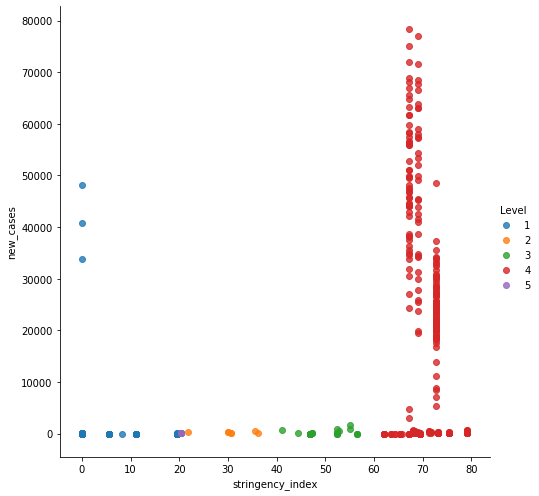

In [16]:
sns.lmplot('stringency_index','new_cases', covid1, height=7, fit_reg=False, hue = 'Level')

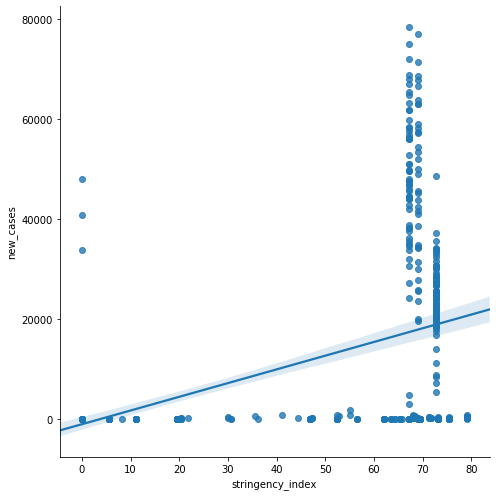

In [17]:
sns.lmplot('stringency_index', 'new_cases', covid1, height=7, fit_reg=True)

#### As predicted, there is a positive correlation as stringency levels were adjusted accordingly to the number cases increased.

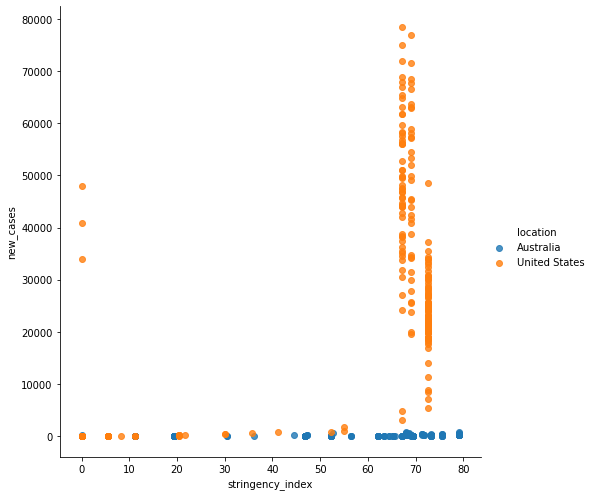

In [18]:
sns.lmplot('stringency_index','new_cases', covid1, height=7, fit_reg=False, hue = 'location')

#### The above graph is to show the comparison of cases reported with different stringency levels across Australia and America.

### Linear regression analysis

#### Now, we will construct a predictive model to estimate and explore the accuracy of our theory.

In [19]:
# Forming X-axis and Y-axis values
X = covid1[['stringency_index', 'Level']]
y = covid1['new_cases']

In [20]:
# Splitting into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [21]:
X_train

,stringency_index,Level
40712,5.56,1
2093,0.00,1
2210,69.44,4
40765,72.69,4
2193,69.44,4
...,...,...
2091,0.00,1
2198,69.44,4
2113,11.11,1
2189,73.15,4


In [22]:
X_test

,stringency_index,Level
2180,73.15,4
2183,73.15,4
2253,46.76,3
40715,5.56,1
2139,19.44,1
...,...,...
40788,72.69,4
2327,75.46,4
40845,68.98,4
2178,73.15,4


In [23]:
y_train

40712        0.0
2093         0.0
2210        24.0
40765    33323.0
2193        36.0
          ...   
2091         0.0
2198         7.0
2113         0.0
2189        44.0
40840    31390.0
Name: new_cases, Length: 362, dtype: float64

In [24]:
y_test

2180       139.0
2183       112.0
2253        12.0
40715        0.0
2139         0.0
          ...   
40788    33955.0
2327        99.0
40845    42486.0
2178       248.0
2104         0.0
Name: new_cases, Length: 156, dtype: float64

In [25]:
# Performing linear regression on the model
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
clf.predict(X_test)

array([ 1.81234067e+04,  1.81234067e+04,  1.25129957e+04, -1.28565437e+01,
       -1.57708965e+03, -1.57708965e+03,  1.81752473e+04,  6.13738273e+02,
       -1.57708965e+03,  6.13738273e+02,  5.75420318e+03,  6.13738273e+02,
        1.88018421e+04, -1.28565437e+01,  1.81752473e+04, -1.28565437e+01,
        1.81752473e+04,  3.26560321e+04, -1.28565437e+01,  1.82800554e+04,
        1.88018421e+04, -1.57708965e+03, -6.38324392e+02, -1.28565437e+01,
        1.81752473e+04, -1.57708965e+03,  1.86970340e+04, -1.57708965e+03,
        1.86970340e+04,  1.78630769e+04,  6.13738273e+02,  1.81752473e+04,
        1.81752473e+04,  1.88018421e+04,  1.85933528e+04,  6.13738273e+02,
        6.13738273e+02,  6.13738273e+02,  1.25129957e+04,  6.13738273e+02,
        1.81752473e+04,  1.81752473e+04,  1.24611551e+04,  1.85415122e+04,
        1.81752473e+04,  1.88018421e+04,  1.85933528e+04,  1.88018421e+04,
       -1.57708965e+03,  1.81234067e+04,  1.81752473e+04,  6.13738273e+02,
        1.85933528e+04,  

<b>The fit method is used to train the model. If we look at the output and compare it to y_test output then we can see that they are in similar range although not very close.</b>

In [27]:
clf.score(X_test, y_test)

0.14680896023208267

#### Here, we can see that due to the nature of the data set, the accuracy is 15% which is quite low. This indicates that the new cases being predicted using this model is not very accurate.

### Boxplots

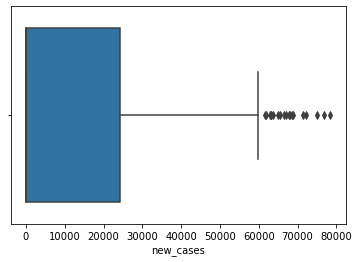

In [22]:
sns.boxplot(x="new_cases", data=covid1)

<b>Most of the values range between 0 and approx. 24000. There are quite a lot of outliers which suggests ineffective lockdowns in many countries.
The highest score seems to be 60000 excluding the outliers.</b>

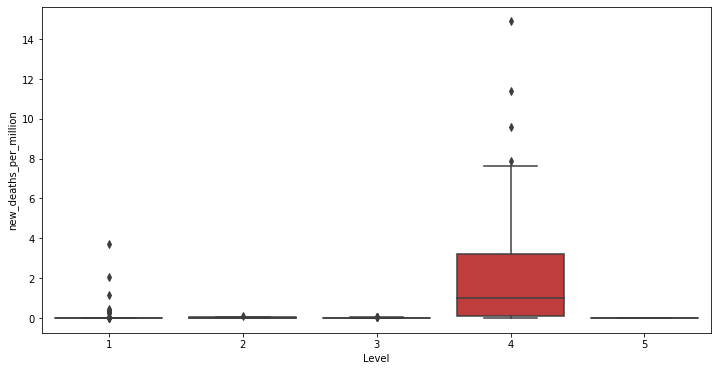

In [23]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Level", y="new_deaths_per_million", data=covid1)

<b>For level 4:
Upper quartile: approx. 3.8
Lower quartile: approx. 0.5
Median: approx. 1
Maximum: approx. 8</b>

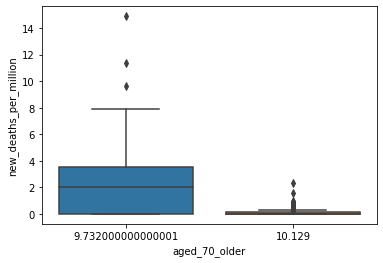

In [24]:
sns.boxplot(x="aged_70_older", y="new_deaths_per_million", data=covid1)

<b>Upper quartile: approx. 3.7
Lower quartile: approx. 0
Median: 2</b>


Note: Seventy-five percent of the scores fall below the upper quartile value. Thus, 25% of data are above this value. Whiskers represent scores outside of the middle 50%. And 25% percent of scores fall below the lower quartile value.

### Logistic regression analysis

In [25]:
## Examine the data: check number of rows and number of columns
covid1.shape

(518, 42)

In [26]:
# Look at the statistical summary of the dataframe
covid1.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,Level
count,5.180000e+02,518.000000,506.000000,518.000000,518.000000,506.000000,518.000000,518.000000,506.000000,518.000000,...,518.000000,518.000000,518.000000,518.000000,518.000000,0.0,518.000000,518.000000,518.000000,518.000000
mean,9.504039e+05,12638.281853,12710.977704,37154.096525,376.233591,380.518935,3015.529695,40.044015,40.296980,114.649311,...,0.850000,129.440000,7.930000,16.050000,20.550000,NaN,3.305000,81.150000,0.931500,3.050193
std,1.747998e+06,19799.469844,19622.441252,61213.837247,651.134642,606.261188,5209.352951,58.804468,58.214152,183.566693,...,0.350338,21.669927,2.862765,3.052948,4.053915,NaN,0.535517,2.292214,0.007507,1.360321
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.500000,107.791000,5.070000,13.000000,16.500000,NaN,2.770000,78.860000,0.924000,1.000000
25%,7.025000e+01,5.000000,7.857000,2.000000,0.000000,0.000000,1.050000,0.118000,0.226500,0.039000,...,0.500000,107.791000,5.070000,13.000000,16.500000,NaN,2.770000,78.860000,0.924000,1.000000
50%,7.618000e+03,124.500000,154.428500,104.000000,3.000000,2.642500,289.432500,4.000000,4.781500,4.000000,...,0.850000,129.440000,7.930000,16.050000,20.550000,NaN,3.305000,81.150000,0.931500,4.000000
75%,1.249880e+06,24224.250000,23833.393250,75110.250000,673.750000,786.714500,3776.041500,73.184250,72.003500,226.917000,...,1.200000,151.089000,10.790000,19.100000,24.600000,NaN,3.840000,83.440000,0.939000,4.000000
max,6.519979e+06,78427.000000,67373.571000,194079.000000,4928.000000,2715.143000,19697.664000,236.938000,203.544000,586.337000,...,1.200000,151.089000,10.790000,19.100000,24.600000,NaN,3.840000,83.440000,0.939000,5.000000


In [27]:
# Check number of samples for each index and comment whether dataset is balanced?
print("No. of bengin samples: ", covid1[covid1['total_cases_per_million'] ==2].shape[0])
print("No. of malignant samples: ", covid1[covid1['total_cases_per_million'] ==4].shape[0])

No. of bengin samples:  0
No. of malignant samples:  0


In [28]:
train, test = train_test_split(covid1, test_size=0.2, random_state=142)
print(train.shape)
print(test.shape)

(414, 42)
(104, 42)


In [29]:
# Getting input data and targets for building logistic regression model
X_train = train.drop(['total_cases_per_million', 'total_deaths_per_million'], axis=1)
Y_train = train['total_cases_per_million']
X_test = test.drop(['total_cases_per_million', 'total_deaths_per_million'], axis=1)
Y_test = test['total_cases_per_million']

print("x_train shape: ", X_train.shape)
print("x_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", Y_test.shape)
print(X_train.head())
print(Y_train.head())

x_train shape:  (414, 40)
x_train shape:  (414,)
X_test shape:  (104, 40)
y_test shape:  (104,)
     iso_code continent   location        date  total_cases  new_cases  \
2222      AUS   Oceania  Australia  2020-05-17       7036.0       17.0   
2205      AUS   Oceania  Australia  2020-04-30       6746.0        8.0   
2190      AUS   Oceania  Australia  2020-04-15       6416.0       50.0   
2161      AUS   Oceania  Australia  2020-03-17        375.0       77.0   
2160      AUS   Oceania  Australia  2020-03-16        298.0       49.0   

      new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
2222              15.286          98.0         0.0                0.143  ...   
2205              13.143          90.0         2.0                2.286  ...   
2190              65.714          61.0         0.0                2.286  ...   
2161              39.286           5.0         0.0                0.286  ...   
2160              31.143           5.0         2.0         

In [30]:
covid1.isnull().sum()
x=covid1.fillna(method='bfill',inplace=True)
print(x)
covid1.dropna().isnull().sum()
covid1

None


/Users/mekalbotani/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,Level
2084,AUS,Oceania,Australia,2019-12-31,0.0,0.0,0.000,0.0,0.0,0.000,...,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.939,1
2085,AUS,Oceania,Australia,2020-01-01,0.0,0.0,0.000,0.0,0.0,0.000,...,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.939,1
2086,AUS,Oceania,Australia,2020-01-02,0.0,0.0,0.000,0.0,0.0,0.000,...,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.939,1
2087,AUS,Oceania,Australia,2020-01-03,0.0,0.0,0.000,0.0,0.0,0.000,...,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.939,1
2088,AUS,Oceania,Australia,2020-01-04,0.0,0.0,0.000,0.0,0.0,0.000,...,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.939,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40919,USA,North America,United States,2020-09-10,6359720.0,31927.0,35044.857,190815.0,1136.0,724.429,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,4
40920,USA,North America,United States,2020-09-11,6397227.0,37507.0,35224.571,191789.0,974.0,713.143,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,4
40921,USA,North America,United States,2020-09-12,6445288.0,48061.0,34794.571,193016.0,1227.0,750.143,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,1
40922,USA,North America,United States,2020-09-13,6486108.0,40820.0,34320.286,193701.0,685.0,737.571,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,1


In [31]:
#Selecting feature columns
feature_cols=['total_cases',                      
'new_cases',                          
'new_cases_smoothed',                
'total_deaths',                      
'new_deaths',                         
'new_deaths_smoothed',               
]

#Training the model and performing regression
X = covid1[feature_cols]
y = covid1['Level']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

y_pred=logreg.predict(X_test)
anf_matrix = metrics.accuracy_score(y_test,y_pred)
anf_matrix

/Users/mekalbotani/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6230769230769231

#### Logistic regression measures the relationship between the categorical dependent variable and one or more independent variables by estimating probabilities using a logistic function, which is the cumulative distribution function of logistic distribution. This is the acccuracy score of logistic regression. We did not take all the features in logistic regression model as there are some string variables in the covid1 dataset. We used some features to fit the logistic regression model. The accuracy score purpose is to determine the accurate of our algorithms in terms of classification. The higher the score the more accuracy it is. In this case, 0.6 is a decent score. However, there is challenge in our logistic regression model, since our owid-covid-data set is not efficient because some of the variables contained strings which resulted in converting string to float error, so we couldn't train and perform prediction on our model.   

## International travel VS Covid-19

In [32]:
covid_AUS['Passengers'] = covid_AUS['Passengers_In']+ covid_AUS['Passengers_Out']
covi_aus = covid_AUS[covid_AUS['Year'] == 2020]
print(covi_aus)
covi_aus.head()

       Month                      Airline   Port_Country  Passengers_In  \
41955  43831  Air Caledonie International  New Caledonia           7969   
41956  43831                   Air Canada         Canada          19437   
41957  43831                 Air Chathams    New Zealand            179   
41958  43831                    Air China          China          19182   
41959  43831                    Air India          India           8310   
...      ...                          ...            ...            ...   
42557  44013        United Parcel Service      Singapore              0   
42558  44013        United Parcel Service            USA              0   
42559  44013             Vietnam Airlines        Vietnam             39   
42560  44013             Virgin Australia            USA              0   
42561  44013              Xiamen Airlines          China            217   

       Freight_In_(tonnes)  Mail_In_(tonnes)  Passengers_Out  \
41955                1.552         

,Month,Airline,Port_Country,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Year,Month_num,Passengers
41955,43831,Air Caledonie International,New Caledonia,7969,1.552,0.437,7018,72.734,7.560,2020,1,14987
41956,43831,Air Canada,Canada,19437,250.179,9.339,17112,459.223,9.931,2020,1,36549
41957,43831,Air Chathams,New Zealand,179,0.516,0.000,206,0.000,0.000,2020,1,385
41958,43831,Air China,China,19182,274.856,66.709,18382,478.758,2.110,2020,1,37564
41959,43831,Air India,India,8310,136.654,16.673,7987,164.303,0.010,2020,1,16297


In [33]:
# Combining Passengers_In and Passengers_Out to form a single Passengers traffic column
covid_AUS['Passengers'] = covid_AUS['Passengers_In']+ covid_AUS['Passengers_Out']

# Filtering 2020 travel data
covi_aus = covid_AUS[covid_AUS['Year'] == 2020]
print(covi_aus)
covi_aus.head()

       Month                      Airline   Port_Country  Passengers_In  \
41955  43831  Air Caledonie International  New Caledonia           7969   
41956  43831                   Air Canada         Canada          19437   
41957  43831                 Air Chathams    New Zealand            179   
41958  43831                    Air China          China          19182   
41959  43831                    Air India          India           8310   
...      ...                          ...            ...            ...   
42557  44013        United Parcel Service      Singapore              0   
42558  44013        United Parcel Service            USA              0   
42559  44013             Vietnam Airlines        Vietnam             39   
42560  44013             Virgin Australia            USA              0   
42561  44013              Xiamen Airlines          China            217   

       Freight_In_(tonnes)  Mail_In_(tonnes)  Passengers_Out  \
41955                1.552         

,Month,Airline,Port_Country,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Year,Month_num,Passengers
41955,43831,Air Caledonie International,New Caledonia,7969,1.552,0.437,7018,72.734,7.560,2020,1,14987
41956,43831,Air Canada,Canada,19437,250.179,9.339,17112,459.223,9.931,2020,1,36549
41957,43831,Air Chathams,New Zealand,179,0.516,0.000,206,0.000,0.000,2020,1,385
41958,43831,Air China,China,19182,274.856,66.709,18382,478.758,2.110,2020,1,37564
41959,43831,Air India,India,8310,136.654,16.673,7987,164.303,0.010,2020,1,16297


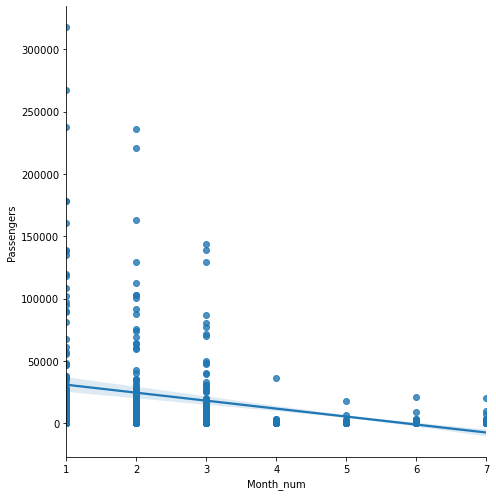

In [34]:
sns.lmplot('Month_num', 'Passengers', covi_aus, height=7, fit_reg=True)

#### The graph indicates that there is a decresing trend in terms of air travels from january to july 2020 which is most likely due to covid-19 since the suggested time frame was the peak of global pandemic across the world.

## Comparison 

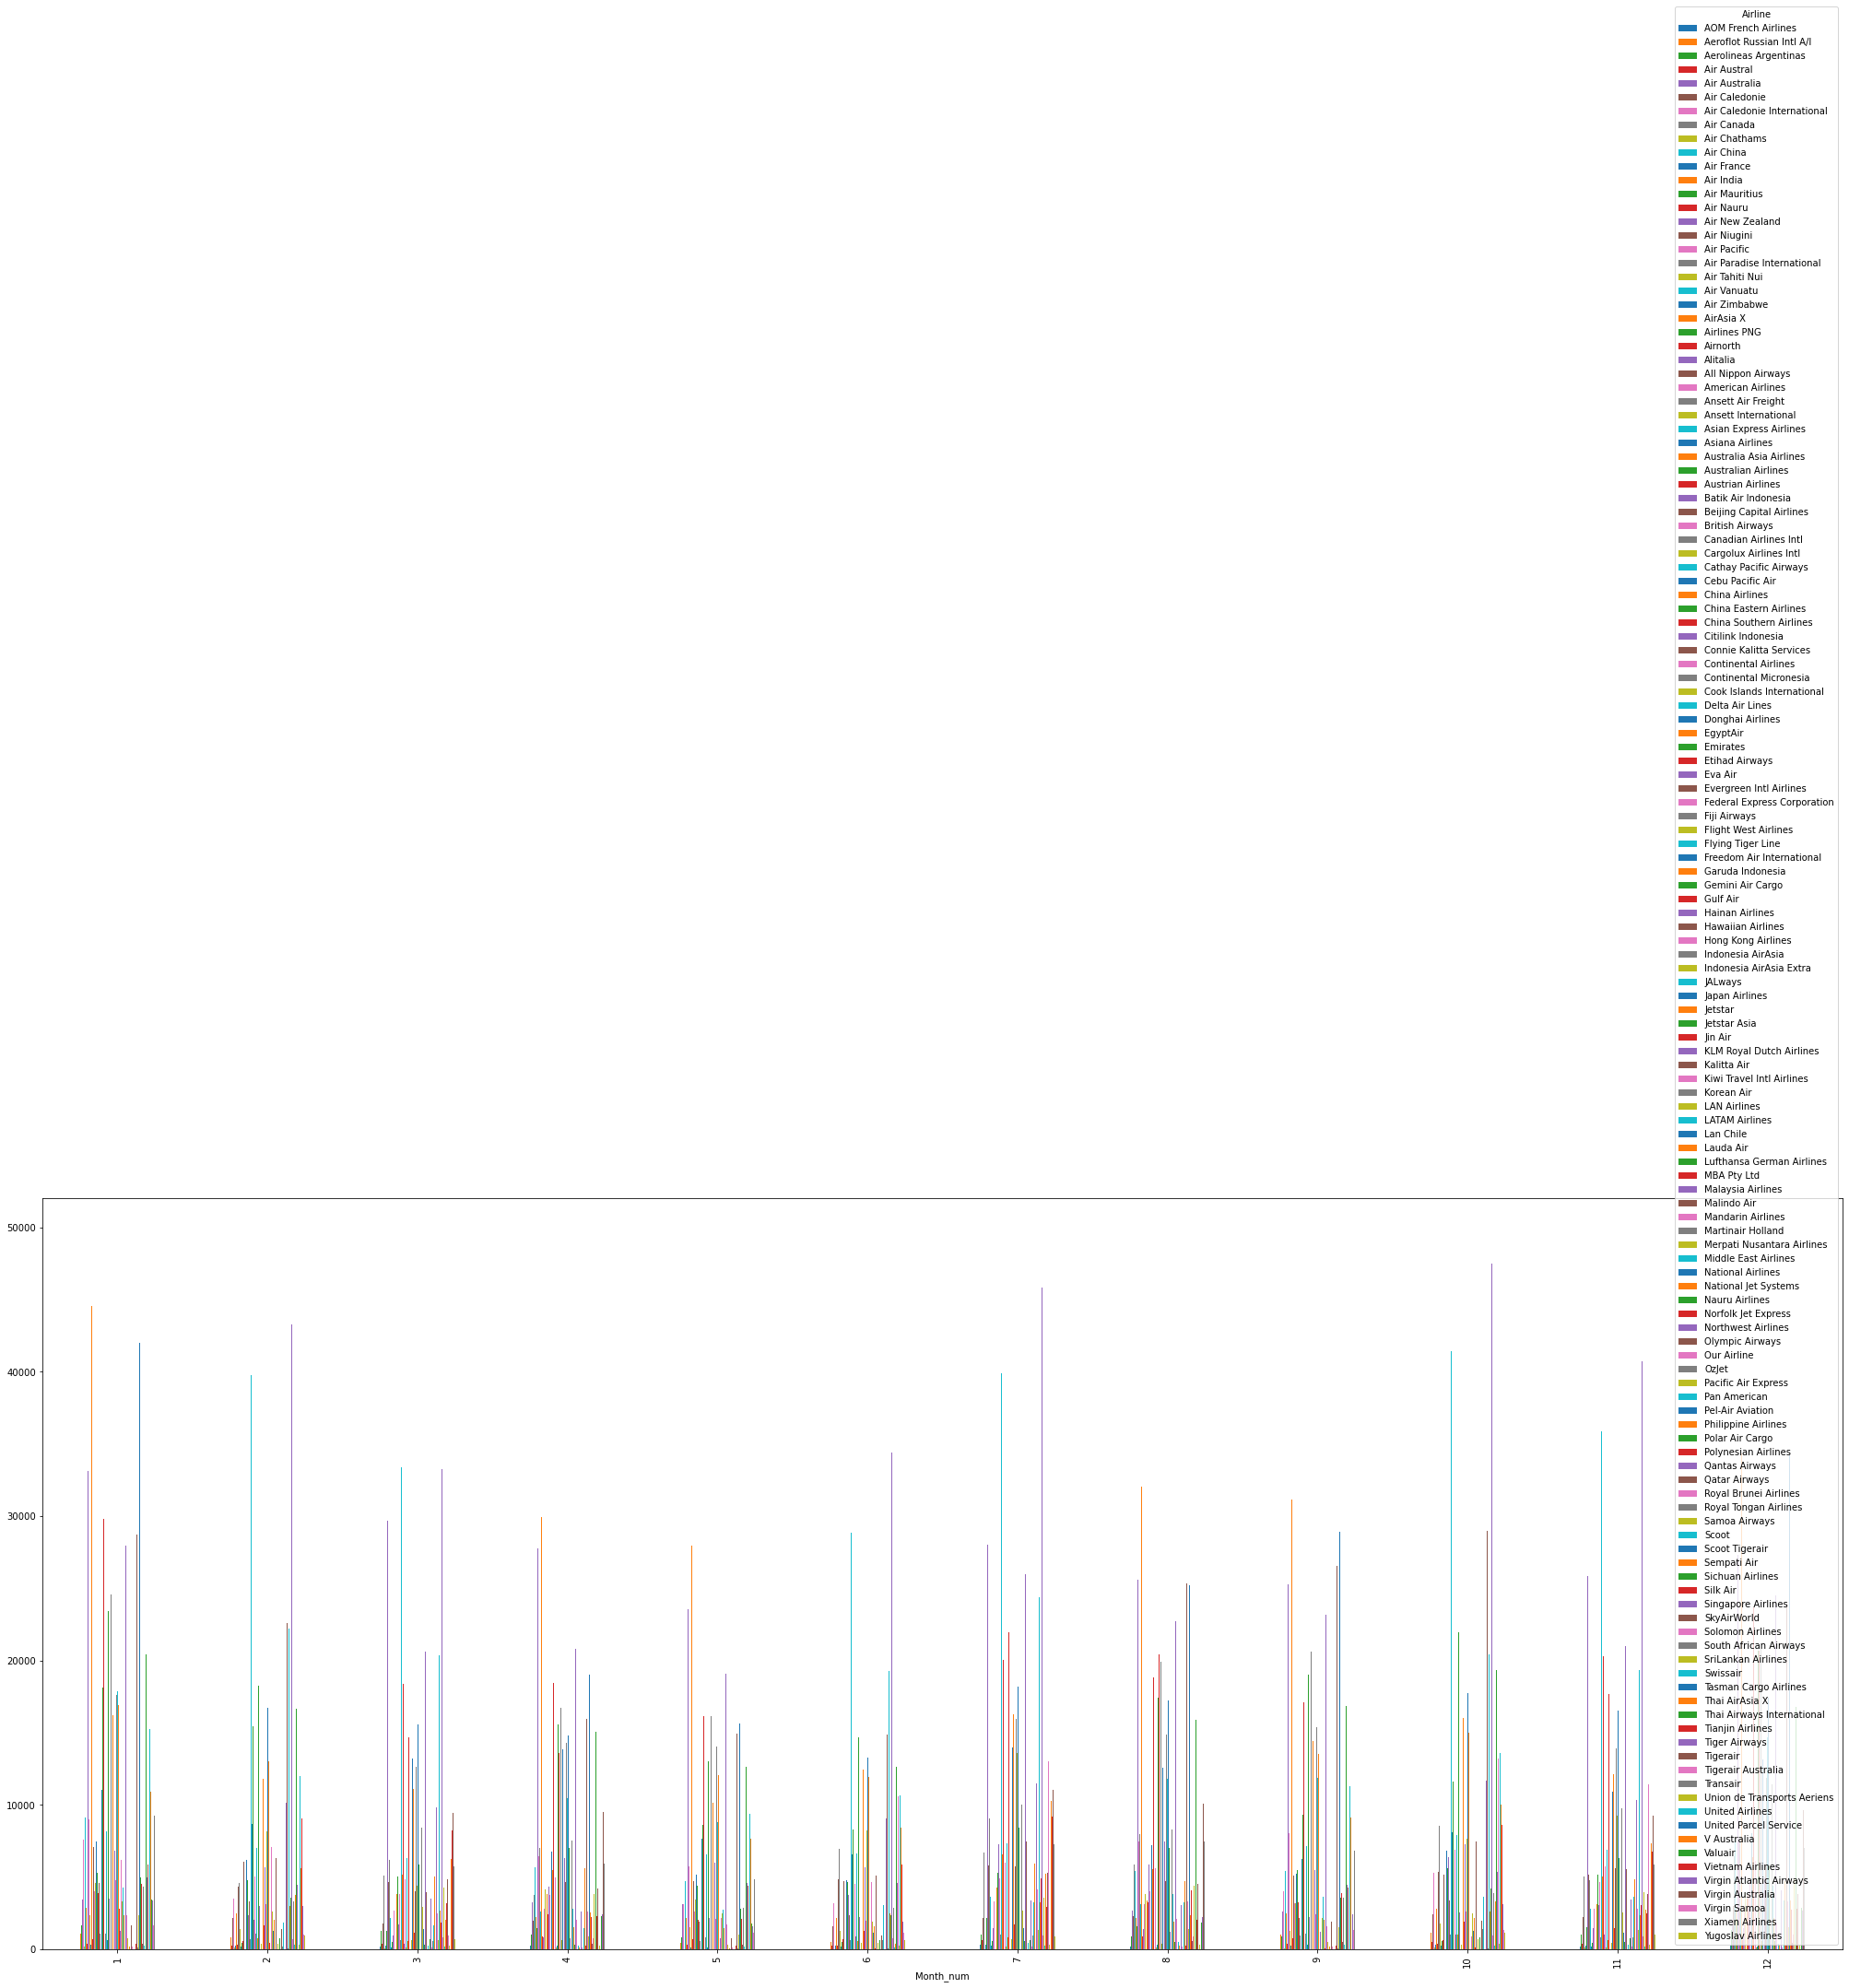

In [35]:
pd.pivot_table(covid_AUS, index = 'Month_num', columns = 'Airline', values 
= 'Passengers_In').plot(kind = 'bar',figsize=(35,15))

### This graph shows: 
* During the first and the second month (January, Feb), we can see how some of the airlines have a huge number of passengers coming into Australia.

* From the third till the fifth month (March - May), we can see how the number of passengers have clearly decreased by at least 10,000.


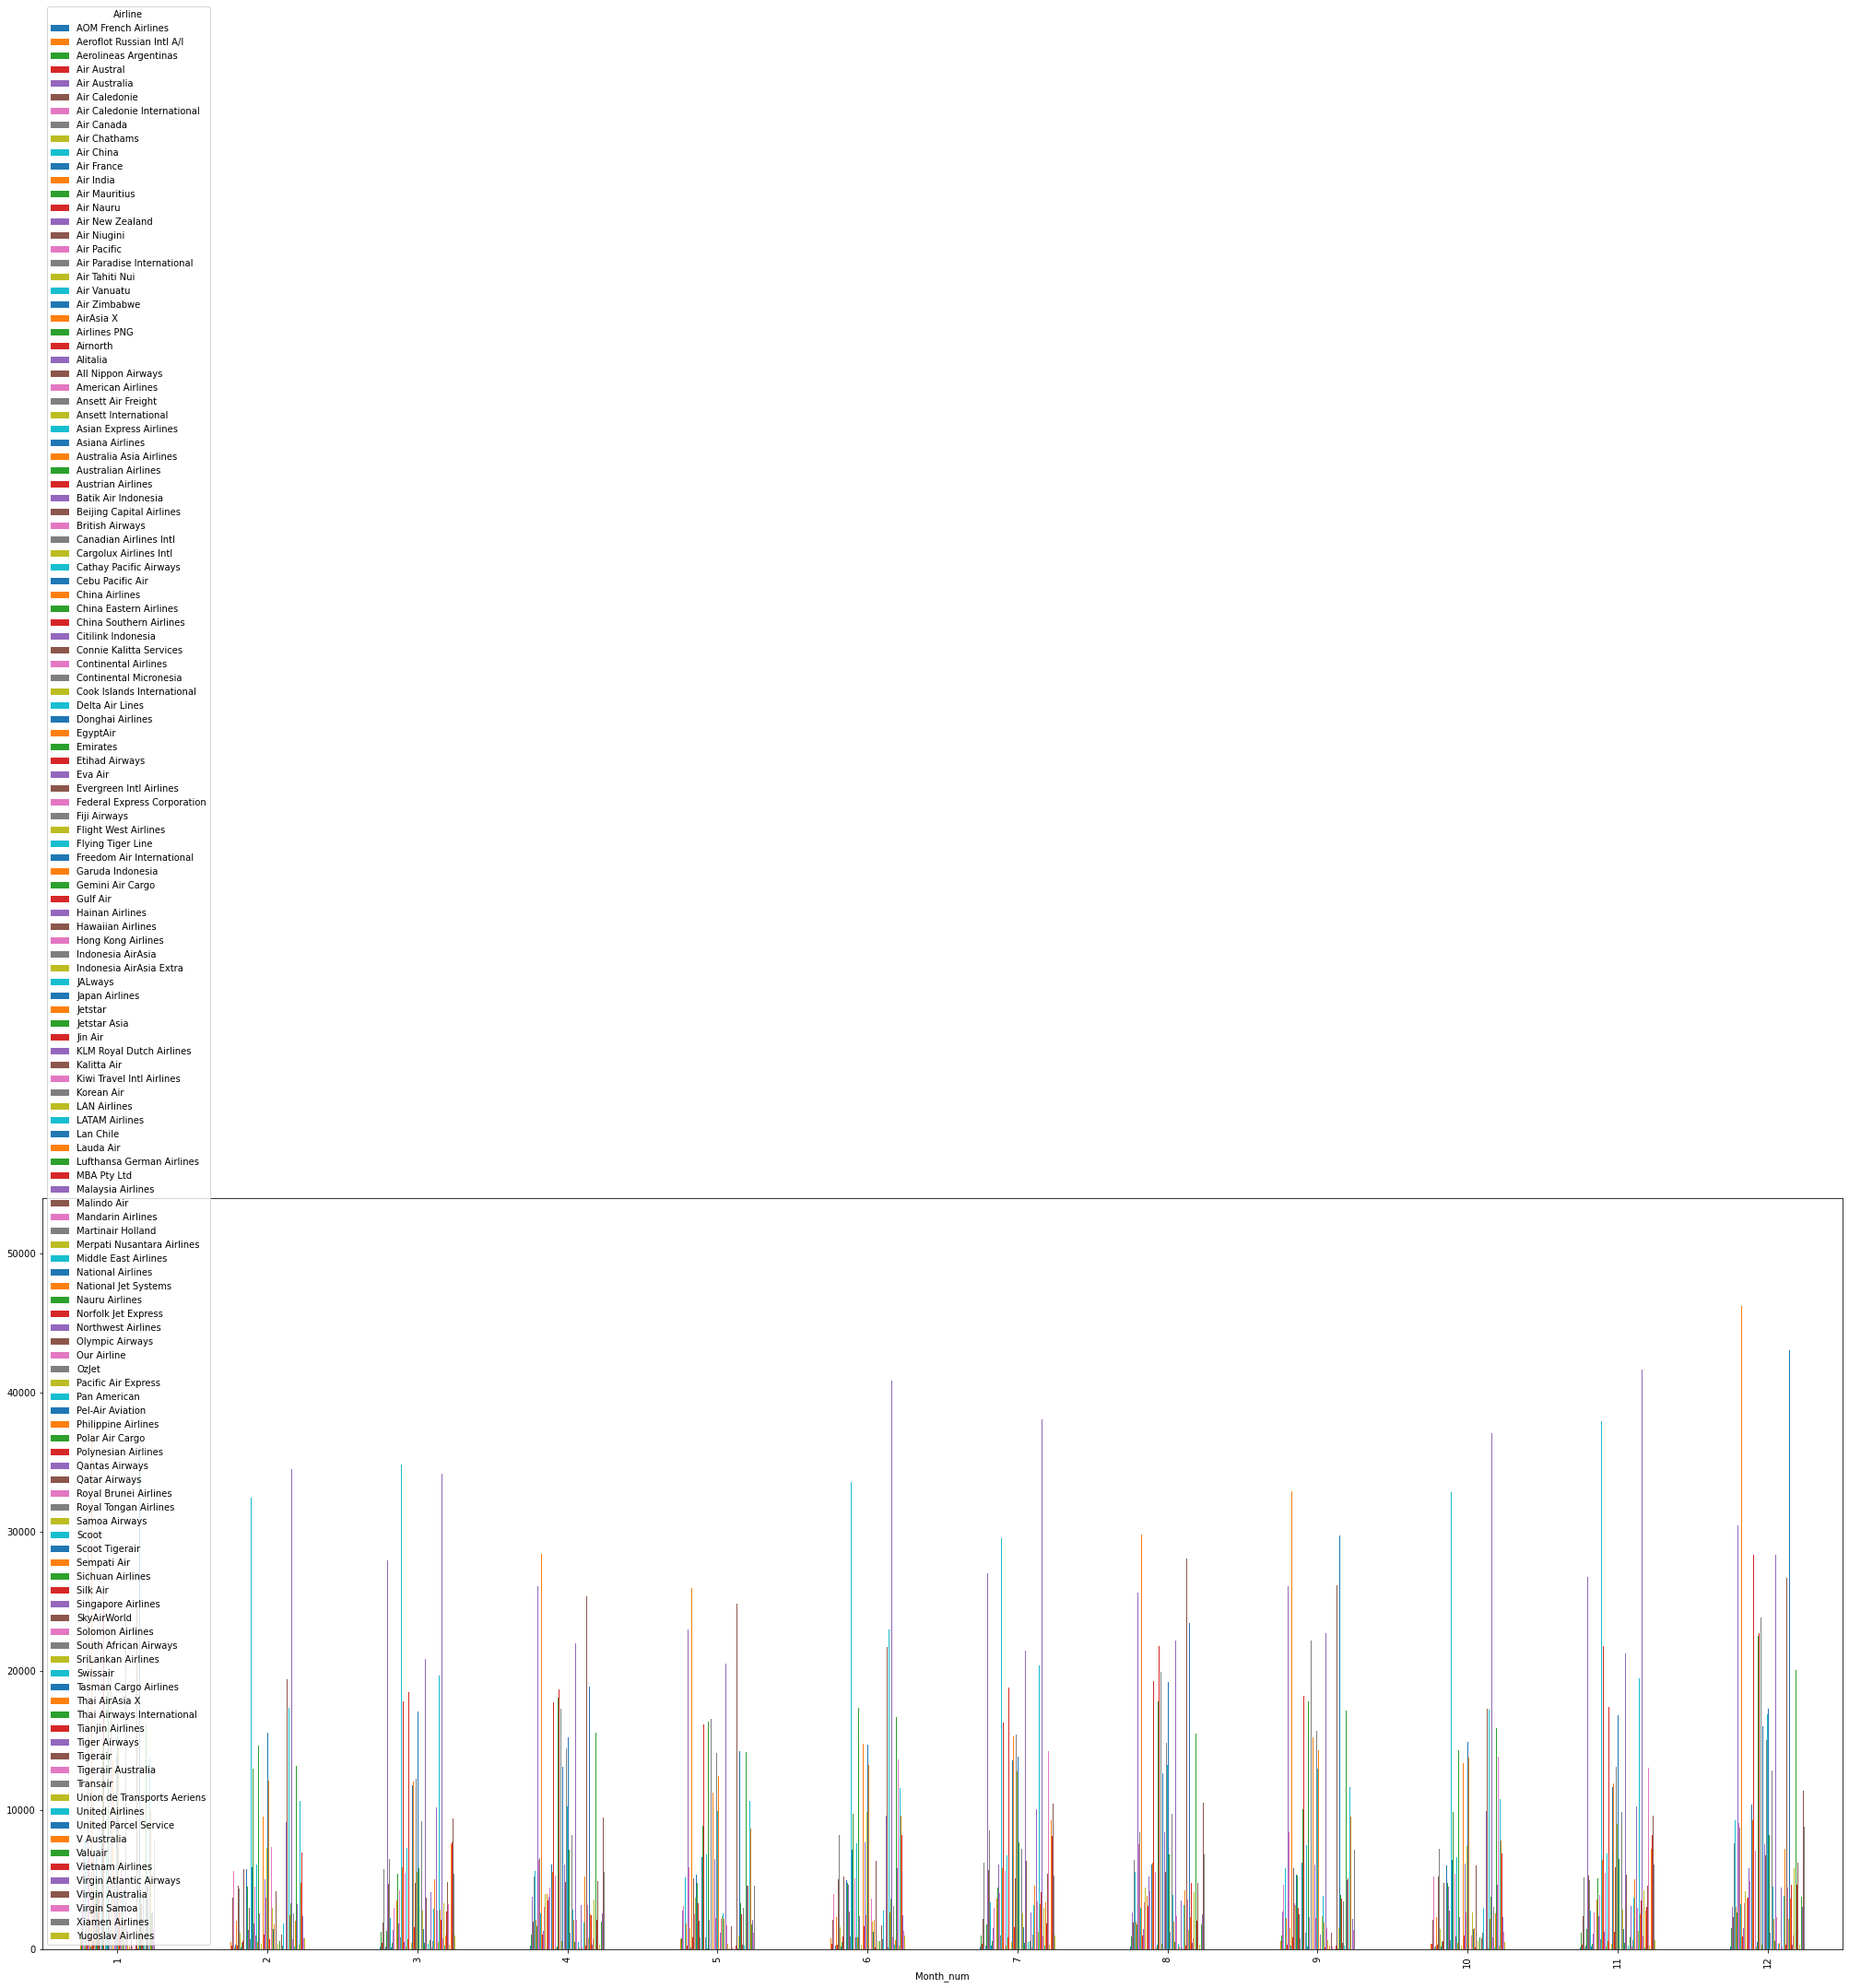

In [36]:
pd.pivot_table(covid_AUS, index = 'Month_num', columns = 'Airline', values 
= 'Passengers_Out').plot(kind = 'bar',figsize=(35,15))

#### This graph shows: 
* From  the first till the third month (January -  March), we can see how some of the airlines have a higher number of passengers going out of Australia.

* During the fourth and the fifth month (April, May), we can see how the number of passengers have clearly decreased by almost 10,000.

In [37]:
covidAU = covid_world[covid_world['location'].isin(['Australia'])]
print(covidAU.shape)
covidAU.head()

(259, 41)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
2084,AUS,Oceania,Australia,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,...,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.939
2085,AUS,Oceania,Australia,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,...,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.939
2086,AUS,Oceania,Australia,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,...,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.939
2087,AUS,Oceania,Australia,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,...,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.939
2088,AUS,Oceania,Australia,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,...,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.939


<ipython-input-38-6e6be707f2fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covidAU['date'] = pd.to_datetime(covidAU['date'])
<ipython-input-38-6e6be707f2fd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covidAU['month'] = covidAU['date'].dt.month


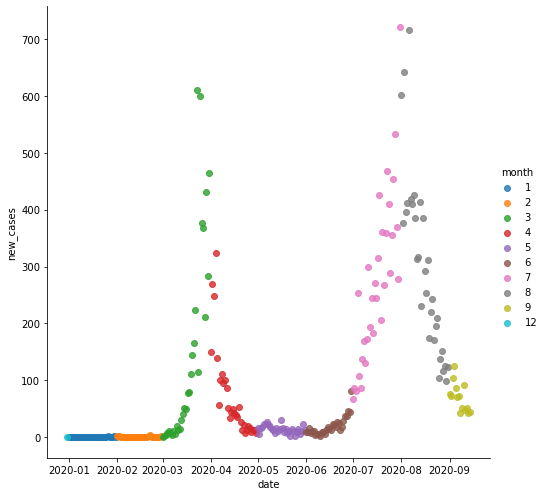

In [38]:
covidAU['date'] = pd.to_datetime(covidAU['date'])
covidAU['month'] = covidAU['date'].dt.month
sns.lmplot('date','new_cases', covidAU, height=7, fit_reg=False, hue = 'month')

* This graph shows the the rise of new cases in Australia during March and April (3 & 4) which is the same months that Australian Airlines have decreased of its passangers' travel from and to Australia. The safety measures that were taken in response to Covid-19 have shown its effect as the following two months (May and June) the number of new cases have dereased.

### Feature Importance using RFE

In [ ]:
X = covid1[['stringency_index', 'Level']]
y = covid1['new_cases']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
clf = LinearRegression()
clf.fit(X_train, y_train)

In [ ]:
clf.predict(X_test)

In [ ]:
clf.score(X_test, y_test)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

estimator = LinearRegression()
rmse_scores = []
for i in range(1,15):
    selector = RFE(estimator, n_features_to_select=i, step=1)
    selector = selector.fit(X_train, y_train)
    y_test_pred = selector.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print("RMSE score on test set using", i, "featuers: ", rmse_test)
    rmse_scores.append(rmse_test)

In [ ]:
rmse_scores

In [ ]:
plt.figure(figsize=(16,9))
plt.grid()   
plt.xlabel('No. of features selected')
plt.ylabel('RMSE on the test set')
plt.title('RMSE score on test set using RFE', fontsize=18, fontweight='bold')
plt.plot(range(1, 15), rmse_scores, marker = 'o', color = 'lightblue', markeredgewidth = 1 ,markeredgecolor = 'DarkBlue', markerfacecolor = 'None')
plt.show()